# Importing Basic required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load dataset

In [5]:
df = pd.read_excel(r'alldatasets.xlsx',sheet_name='Brazil')

In [3]:
df.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn_usd
0,BR1,Brazil,180.35,0.0,16.0,0.399053,0.0,5.0,1,50.0,3.0,0.306352,3.0,1,290.316010
1,BR2,Brazil,164.95,0.0,15.0,0.002132,NaN,5.0,0,52.0,3.0,0.533106,3.0,1,109.973544
2,BR8,Brazil,167.10,1.0,5.0,-2.061853,6.0,5.0,1,49.0,12.0,0.115514,3.0,1,109.973544
3,BR12,Brazil,174.75,0.0,13.0,1.351661,2.0,6.0,1,51.0,5.0,0.597647,3.0,1,1060.838040
4,BR14,Brazil,179.35,0.0,11.0,0.557821,NaN,10.0,1,50.0,3.0,0.483788,3.0,1,353.612680


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   childid        2398 non-null   object 
 1   country        2398 non-null   object 
 2   height         2354 non-null   float64
 3   stunting_2cat  2140 non-null   float64
 4   EDUYRS2        2396 non-null   float64
 5   z_score        2378 non-null   float64
 6   agegapr1       1784 non-null   float64
 7   momeduyrsr1    2393 non-null   float64
 8   chsexr1        2398 non-null   int64  
 9   agemonr1       2143 non-null   float64
 10  hhsizer1       2192 non-null   float64
 11  wi_newr1       2187 non-null   float64
 12  job_cat        2396 non-null   float64
 13  pvt_sector     2398 non-null   int64  
 14  earn_usd       2398 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 281.1+ KB


In [8]:
df.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1', 'hhsizer1',
       'wi_newr1', 'job_cat', 'pvt_sector', 'earn_usd'],
      dtype='object')

Stunting Dataset - Brazil - Private Sector

Stunting Dataset - Brazil - Private Sector
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 2398 

    :Number of Attributes of Interest: 10 numeric/categorical predictive. 

    :Attribute Information (in order):
        - stunting_2cat   Stunting categorized by HAZ score 
        - agemonr1        Age of child in months
        - chsexr1         Sex of child in months categorized 
        - momeduyrsr1     Maternal education in years
        - hhsizer1        Number of House hold members
        - wi_newr1        Wealth 
        - agegapr1        Age gap between parents
        - height          Adulthood height (outcome variable)
        - z_score         Cognitive score converted to Zscore (outcome variable)
        - EDUYRS2         Total number of years of education attained (outcome variable)

# Exploratory data analysis

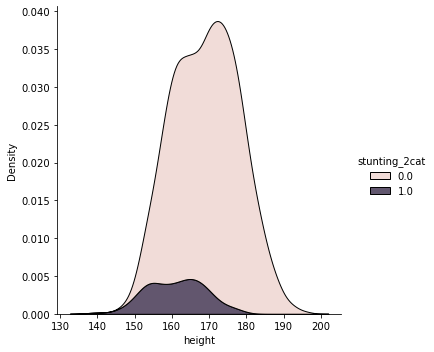

In [11]:
import seaborn as sns
sns.displot(df, x="height", hue="stunting_2cat", kind="kde", multiple="stack")

In [12]:
df=df[[ 'stunting_2cat',  'agemonr1','chsexr1',
       'agegapr1', 'momeduyrsr1',   'hhsizer1',
       'wi_newr1','height',]]

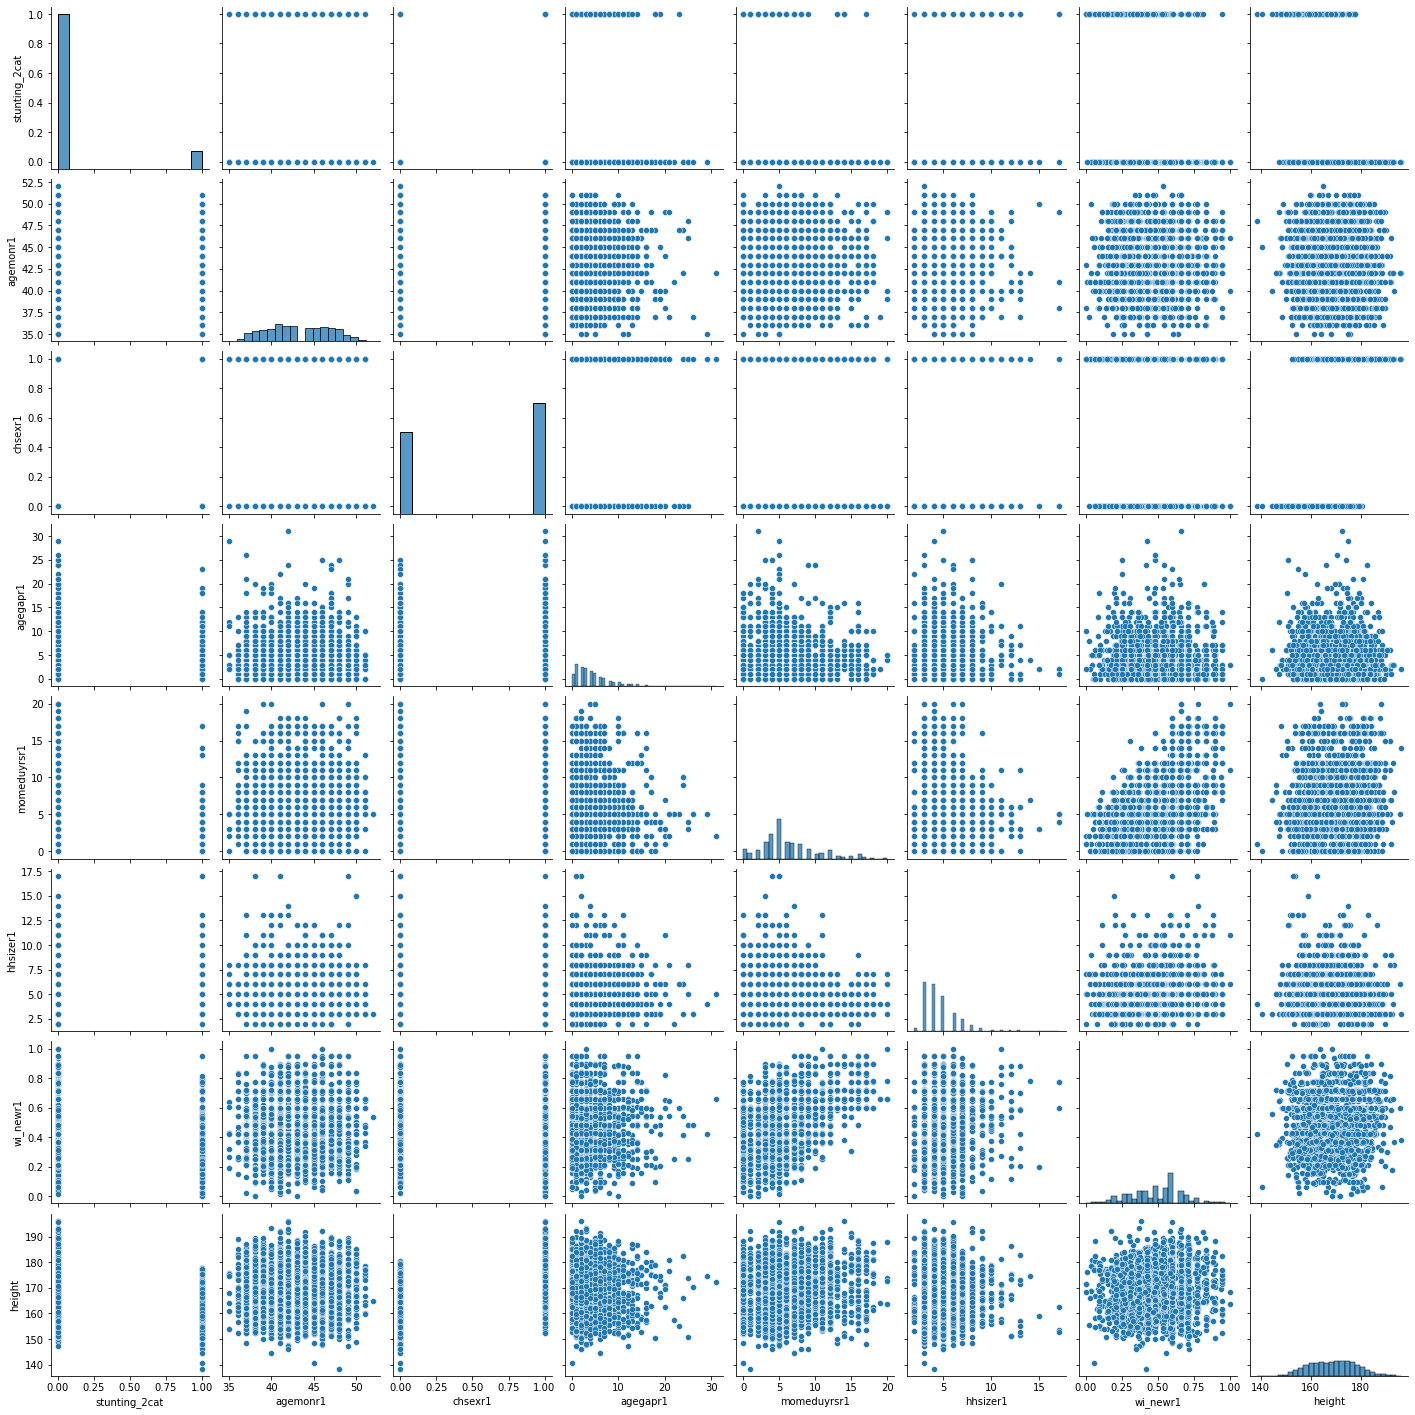

In [14]:
sns.pairplot(df)

# Checking for Linearity - Scatterplots

In [15]:
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Text(0.5, 1.0, 'Relationship between age and height')

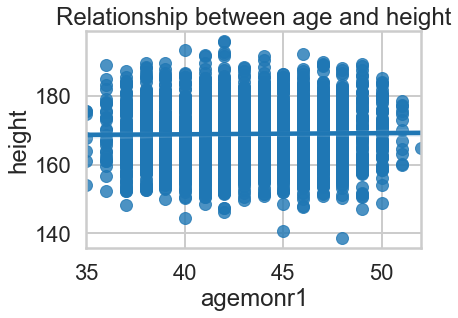

In [16]:
sns.regplot(y="height", x="agemonr1", data=df, fit_reg = True)
plt.title("Relationship between age and height")

Text(0.5, 1.0, 'Relationship between age gap and height')

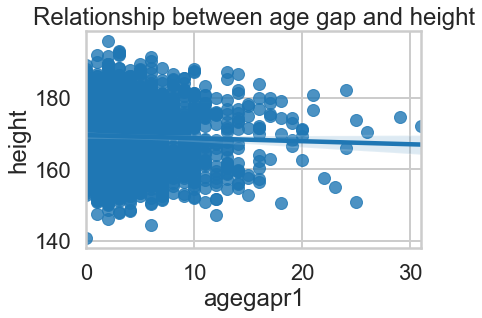

In [18]:
sns.regplot(y="height", x="agegapr1", data=df, fit_reg = True)
plt.title("Relationship between age gap and height")

Text(0.5, 1.0, 'Relationship between maternal education and height')

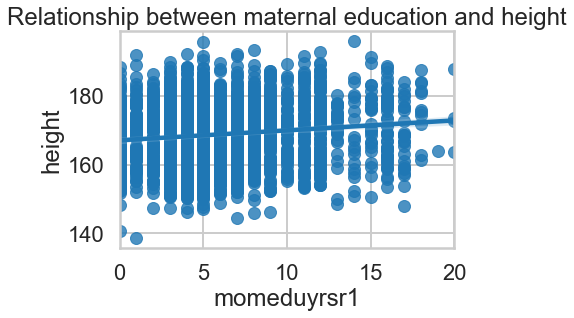

In [20]:
sns.regplot(y="height", x="momeduyrsr1", data=df, fit_reg = True)
plt.title("Relationship between maternal education and height")

Text(0.5, 1.0, 'Relationship between household size and height')

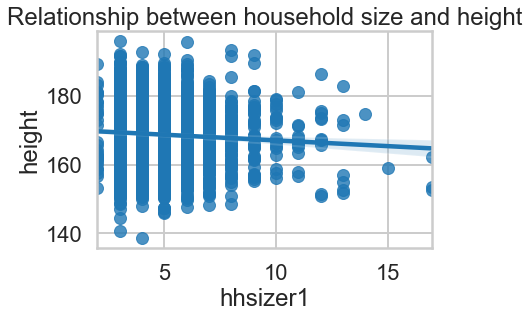

In [21]:
sns.regplot(y="height", x="hhsizer1", data=df, fit_reg = True)
plt.title("Relationship between household size and height")

Text(0.5, 1.0, 'Relationship between Wealth index and height')

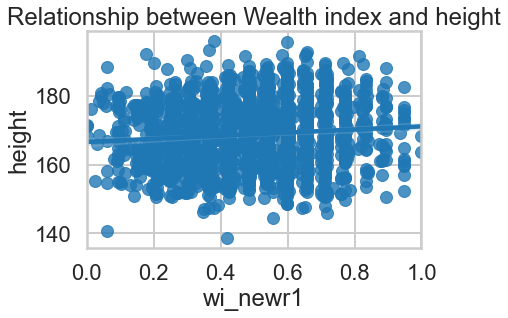

In [28]:
sns.regplot(y="height", x="wi_newr1", data=df, fit_reg = True)
plt.title("Relationship between Wealth index and height")

# Checking for Normality: Histograms

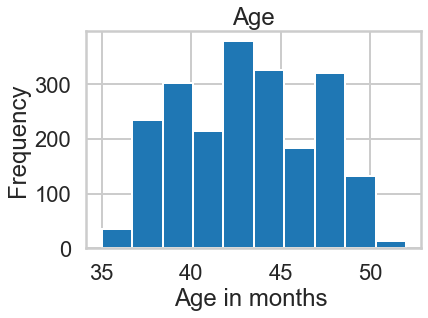

In [59]:
plt.hist(df.agemonr1)
plt.title("Age")
plt.xlabel("Age in months ")
plt.ylabel("Frequency")
plt.show()

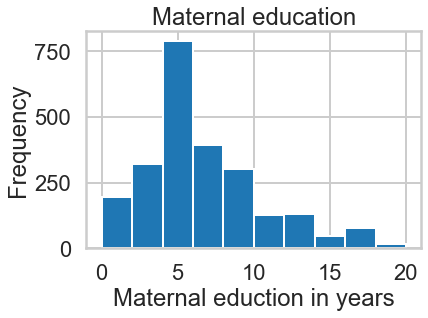

In [61]:
plt.hist(df.momeduyrsr1)
plt.title("Maternal education")
plt.xlabel("Maternal eduction in years")
plt.ylabel("Frequency")
plt.show()

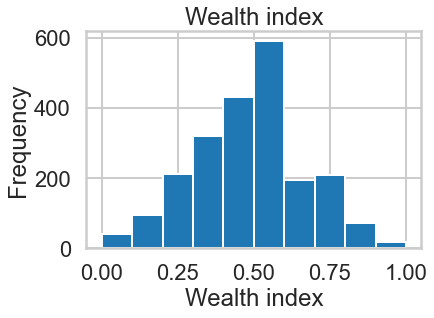

In [63]:
plt.hist(df.wi_newr1)
plt.title("Wealth index")
plt.xlabel("Wealth index")
plt.ylabel("Frequency")
plt.show()

# Checking for correlation between our Features- Coorelation Matrix

In [23]:
df_cor=df[[ 'stunting_2cat',  'agemonr1','chsexr1',
       'agegapr1', 'momeduyrsr1',   'hhsizer1',
       'wi_newr1']]

In [24]:
df_cor.corr()

,stunting_2cat,agemonr1,chsexr1,agegapr1,momeduyrsr1,hhsizer1,wi_newr1
stunting_2cat,1.000000,-0.030329,-0.000174,0.010268,-0.180124,0.121930,-0.205342
agemonr1,-0.030329,1.000000,-0.006208,0.002422,0.015338,-0.009690,0.039606
chsexr1,-0.000174,-0.006208,1.000000,-0.008535,-0.014048,-0.052984,-0.015813
agegapr1,0.010268,0.002422,-0.008535,1.000000,-0.100433,0.040919,-0.028799
momeduyrsr1,-0.180124,0.015338,-0.014048,-0.100433,1.000000,-0.194172,0.463264
hhsizer1,0.121930,-0.009690,-0.052984,0.040919,-0.194172,1.000000,0.122079
wi_newr1,-0.205342,0.039606,-0.015813,-0.028799,0.463264,0.122079,1.000000


# Linear Regression with Stunting Data - Brazil Example
y  = Adulthood Height

and

𝑋  = all the other features (or independent variables, predictors)

which will be use to fit a linear regression model and predict Adulthood Height. Will use the least-squares method to estimate the coefficients.

## Fitting Linear Regression using statsmodels

# Height

In [25]:
import statsmodels.api as sm

In [26]:
#Height

X = df["stunting_2cat"] ## X usually means our input variables (or independent variables)
y = df["height"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X,missing='drop').fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.97e-43
Time:                        20:58:13   Log-Likelihood:                -7523.7
No. Observations:                2104   AIC:                         1.505e+04
Df Residuals:                    2102   BIC:                         1.506e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           169.8540      0.199    853.774      0.000     169.464     170.244
stunting_2cat    -8.8009      0.624    -14.108      0.000     -10.024      -7.578
==============================================================================
Omnibus:                       67.043   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.786
Skew:                           0.024   Prob(JB):                     1.25e-07
Kurtosis:                       2.400   Cond. No.                         3.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Height covariates

In [27]:
X = df[["stunting_2cat",'agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']] ## X usually means our input variables (or independent variables)
y = df["height"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# Note the difference in argument order
model = sm.OLS(y, X,missing='drop').fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     300.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):          4.35e-279
Time:                        20:58:23   Log-Likelihood:                -4761.9
No. Observations:                1497   AIC:                             9540.
Df Residuals:                    1489   BIC:                             9582.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           159.8537      1.883     84.908      0.000     156.161     163.547
stunting_2cat    -8.6255      0.538    -16.019      0.000      -9.682      -7.569
agemonr1          0.0167      0.041      0.407      0.684      -0.064       0.097
chsexr1          12.9281      0.308     41.936      0.000      12.323      13.533
agegapr1         -0.0513      0.038     -1.352      0.176      -0.126       0.023
momeduyrsr1       0.1875      0.046      4.076      0.000       0.097       0.278
hhsizer1          0.1460      0.087      1.682      0.093      -0.024       0.316
wi_newr1          0.3993      0.983      0.406      0.685      -1.529       2.328
==============================================================================
Omnibus:                        5.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.037
Skew:                           0.132   Prob(JB):                       0.0806
Kurtosis:                       3.105   Cond. No.                         553.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting coefficients
There is a ton of information in this output.We concentrate on the coefficient table (middle table).

We begin interpretting the coefficients by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that our selected features are a statistically significant predictor of Height.

In general, the  𝛽𝑖^,𝑖>0  can be interpreted as the following: "A one unit increase in  𝑥𝑖  is associated with, on average, a  𝛽𝑖^  increase/decrease in  𝑦  net of all other variables."

On the other hand, the interpretation for the intercept,  𝛽̂ 0  is the average of  𝑦  given that all of the independent variables  𝑥𝑖  are 0. Our  𝛽̂ 0  is  159.8cm .

Lets look at our three most significant regression coefficients:

The  regression coefficient is for Stunting of -8.6 means that on average, stunted child on average is associated with an decrease of 8.6cm compared to non stunted child  net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ( 7.6cm,9.6cm ). 

Intrepretting R-squared
This coefficient of determination or r-squared, tells us that 59% percentage of the total variance in the Height can be explained by the linear regression model. This is an important statistics that measures how 'good' our model is a t predicitng price.

This percentage tells us how much of variance in y can be explained by the model we have created, the higher the percent the more the model fits your data.

# Feature Selection

# Forward Selection

In [41]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [43]:
model=forward_selected(df,'height')

In [46]:
print (model.model.formula)

height ~ chsexr1 + stunting_2cat + momeduyrsr1 + agegapr1 + hhsizer1 + 1


In [45]:
print (model.rsquared_adj)

0.5843048493810252


# Stepwise selection

In [55]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

    

In [49]:
df2=df.dropna()

In [52]:
X = df2[["stunting_2cat",'agemonr1','chsexr1','agegapr1','momeduyrsr1','hhsizer1','wi_newr1']] ## X usually means our input variables (or independent variables)
y = df2["height"]

In [56]:
result = stepwise_selection(X, y)
print('resulting features:')
print(result)

Add  chsexr1                        with p-value 2.00994e-223
Add  stunting_2cat                  with p-value 2.67246e-60
Add  momeduyrsr1                    with p-value 1.9866e-06
resulting features:
['chsexr1', 'stunting_2cat', 'momeduyrsr1']
